In [1]:
import json
import torch
from utils.dataset import make_loader

## 1.0 Dataset

### 1.1 Train set

In [2]:
with open('./processed/train.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

In [12]:
data[2].keys()

dict_keys(['dial', 'objects', 'reference_mask', 'reference_idx', 'candidate_ids', 'candidate_pos', 'candidate_bbox', 'candidate_relations', 'scene_seg', 'KB_ids', 'scenes', 'domain', 'dial_idx', 'round_idx', 'candidate_mentioned'])

In [59]:
print('0:', data[0]['dial'], '\n')
print('1:', data[1]['dial'], '\n')
print('2:', data[2]['dial'], '\n')
print('3:', data[3]['dial'], '\n')
print('4:', data[4]['dial'], '\n')

0: User : Hi, do you have any jackets today? 

1: User : Hi, do you have any jackets today? System : I do, over at the back right there are a couple of black ones hanging on the wall in the bottom row.  There's also a brown jacket hanging up high to the right. System mentions : 82 and 58 and 59 User : Can you compare the brown one and the black one that's second from the left? 

2: User : Hi, do you have any jackets today? System : I do, over at the back right there are a couple of black ones hanging on the wall in the bottom row.  There's also a brown jacket hanging up high to the right. System mentions : 82 and 58 and 59 User : Can you compare the brown one and the black one that's second from the left? System : Yes, the brown one costs $199.99 and the black one costs $44.99. System mentions : 59 and 82 User : Are there any more jackets? 

3: User : Hi, do you have any jackets today? System : I do, over at the back right there are a couple of black ones hanging on the wall in the bot

In [57]:
print(data[6]['dial_idx'], data[7]['dial_idx'], data[8]['dial_idx'])

12304 12304 10540


In [54]:
for i in range(0, 7):
    if data[i]['candidate_ids'].sort() != data[i+1]['candidate_ids'].sort():
        print("Different!")

### 1.2 Dev set

In [103]:
with open('./processed/dev.json', 'r', encoding='utf-8') as f:
    data = json.load(f)

In [104]:
data[1].keys()

dict_keys(['dial', 'objects', 'reference_mask', 'reference_idx', 'candidate_ids', 'candidate_pos', 'candidate_bbox', 'candidate_relations', 'scene_seg', 'KB_ids', 'scenes', 'domain', 'dial_idx', 'round_idx', 'candidate_mentioned'])

In [105]:
print('0:', data[0]['dial'], '\n')
print('1:', data[1]['dial'], '\n')
print('2:', data[2]['dial'], '\n')
print('3:', data[3]['dial'], '\n')
print('4:', data[4]['dial'], '\n')

0: User : Do you have any shirts with good reviews? 

1: User : Do you have any shirts with good reviews? System : There are three shirts on the display table: a blue and white, a brown, and a grey and brown. System mentions : 37 and 40 and 12 User : Do you have anything with a similar size as the brown shirt and the grey and brown? 

2: User : Do you have any shirts with good reviews? System : There are three shirts on the display table: a blue and white, a brown, and a grey and brown. System mentions : 37 and 40 and 12 User : Do you have anything with a similar size as the brown shirt and the grey and brown? System : I have that grey and brown shirt, as well as the blue and white one on the table and the grey and black on the wall. System mentions : 33 and 37 and 12 User : Do you have the cost and size of the blue and white shirt and the grey and black? 

3: User : Do you have any shirts with good reviews? System : There are three shirts on the display table: a blue and white, a brow

In [106]:
print(data[5]['dial_idx'], data[6]['dial_idx'], data[7]['dial_idx'])

10507 10507 10543


In [110]:
print('Candidate ids:', data[2]['candidate_ids'], 'Length:', len(data[2]['candidate_ids']))
print('Candidate kb_ids:', data[2]['KB_ids'], 'Length:', len(data[2]['KB_ids']))
print('Candidate mentions:', data[1]['candidate_mentioned'])

Candidate ids: [0, 33, 7, 34, 35, 36, 37, 38, 39, 12, 40, 11, 41, 13, 42, 43, 15, 16, 17, 19, 18, 20, 21, 22, 88, 90, 98, 99, 89, 100, 101, 102, 23, 25, 26, 27, 28, 93, 91, 92, 29, 30, 94, 95, 97, 103] Length: 46
Candidate kb_ids: [2, 203, 161, 232, 75, 84, 18, 265, 174, 22, 13, 38, 221, 38, 233, 284, 238, 19, 119, 92, 10, 241, 264, 217, 2, 15, 222, 19, 187, 1, 3, 211, 116, 185, 16, 185, 14, 16, 16, 185, 71, 178, 269, 222, 227, 254] Length: 46
Candidate mentions: [0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [111]:
for i in range(0, 6):
    if sorted(data[i]['candidate_ids']) != sorted(data[i+1]['candidate_ids']):
        print("Different ids!")
    if sorted(data[i]['candidate_pos']) != sorted(data[i+1]['candidate_pos']):
        print("Different pos!")
    if sorted(data[i]['candidate_bbox']) != sorted(data[i+1]['candidate_bbox']):
        print("Different bbox!")
    if sorted(data[i]['KB_ids']) != sorted(data[i+1]['KB_ids']):
        print("Different kb_ids!")
    if data[i]['candidate_mentioned'] != data[i+1]['candidate_mentioned']:
        print("Different mentions!")

Different mentions!
Different mentions!
Different mentions!
Different mentions!
Different mentions!


## 2.0 Scene-independent? Seen and unseen scenes/objects

In [34]:
import json
import torch

In [3]:
with open('./processed/train.json', 'r', encoding='utf-8') as f:
    train_data = json.load(f)

with open('./processed/dev.json', 'r', encoding='utf-8') as f:
    dev_data = json.load(f)

with open('./processed/devtest.json', 'r', encoding='utf-8') as f:
    devtest_data = json.load(f)

print(len(train_data))
print(len(dev_data))
print(len(devtest_data))

33801
3080
7669


In [5]:
def calc_stats(data):
    n_total = 0
    n_fash = 0
    n_furn = 0

    for line in data:
        n_total += 1
        if line['domain'] == 'fashion':
            n_fash += 1
        else:
            n_furn += 1
        
    return n_total, n_fash, n_furn

n_total_train, n_fash_train, n_furn_train = calc_stats(train_data)
n_total_dev, n_fash_dev, n_furn_dev = calc_stats(dev_data)
n_total_devtest, n_fash_devtest, n_furn_devtest = calc_stats(devtest_data)

print(n_total_train, n_fash_train, n_furn_train)
print(n_total_dev, n_fash_dev, n_furn_dev)
print(n_total_devtest, n_fash_devtest, n_furn_devtest)
print(n_total_train + n_total_dev + n_total_devtest)
print(n_fash_train + n_fash_dev + n_fash_devtest)
print(n_furn_train + n_furn_dev + n_furn_devtest)

33801 24315 9486
3080 3080 0
7669 5813 1856
44550
33208
11342


In [9]:
all_train_scenes = set()
for line in train_data:
    all_train_scenes.update(line['scenes'])
print(len(all_train_scenes))

all_devtest_scenes = set()
for line in devtest_data:
    all_devtest_scenes.update(line['scenes'])
print(len(all_devtest_scenes))

1124
263


In [12]:
n_unseen_scenes = 0
for scene in all_devtest_scenes:
    if scene not in all_train_scenes:
        n_unseen_scenes += 1
print('Number of devtest scenes:', len(all_devtest_scenes))
print('Number of unseen scenes:', n_unseen_scenes)

Number of devtest scenes: 263
Number of unseen scenes: 263


In [64]:
# Checking the maximum number of scenes per dialog

max_scenes = 0
for line in train_data:
    if len(line['scenes']) > max_scenes:
        max_scenes = len(line['scenes'])
print("Max number of scenes in a training dialog:", max_scenes)

max_scenes = 0
for line in devtest_data:
    if len(line['scenes']) > max_scenes:
        max_scenes = len(line['scenes'])
print("Max number of scenes in a devtest dialog:", max_scenes)

Max number of scenes in a training dialog: 2
Max number of scenes in a devtest dialog: 2


It seems like there are no seen scenes in the devtest, or atleast, with the same name. Things to do or experiment now:
- How the scenes are named? Look for name patterns?
    - Domain + store + setting + photo ID, for example 'cloth_store_1416238_woman_10_5' would be domain='cloth_store', store='1416238_woman', setting='10' and photoID='5'. Another example would be 'cloth_store_1_2_3' where domain='cloth_store', store='1', setting='2' and photoID='3'.
- Are the different scenes generated just by changing the camera position?
    - Not just the camera position, the items of the store are also changed.
- Could we elaborate a train/devtest sets that have dis-joint objects?
- Train on clothing test on furniture?
- Train whole UNITER model (unfreeze weights) -> currently training, I believe we can initialize all the weights by changing the parameter 'from_scratch' in './Trasnformers_VQA_master/param.py'

### 2.1 Fashion vs Furniture

In [65]:
n_fash = 0
for scene in all_train_scenes:
    if scene.find('cloth_store') != -1:
        n_fash += 1
print("Number of clothing shop scenes in train:", n_fash)

n_furn = 0
for scene in all_train_scenes:
    if scene.find('wayfair_store') != -1:
        n_furn += 1
print("Number of furniture shop scenes in train:", n_furn)

print(n_fash+n_furn, len(all_train_scenes))

Number of clothing shop scenes in train: 1089
Number of furniture shop scenes in train: 35
1124 1124


In [66]:
n_fash = 0
for scene in all_devtest_scenes:
    if scene.find('cloth_store') != -1:
        n_fash += 1
print("Number of clothing shop scenes in devtest:", n_fash)

n_furn = 0
for scene in all_devtest_scenes:
    if scene.find('wayfair_store') != -1:
        n_furn += 1
print("Number of furniture shop scenes in devtest:", n_furn)

print(n_fash+n_furn, len(all_devtest_scenes))

Number of clothing shop scenes in devtest: 256
Number of furniture shop scenes in devtest: 7
263 263


In [37]:
# CODE TO KNOW IF THERE ARE ANY DOMAIN COLLISIONS IN THE LIST OF SCENES OF A DIALOGUE
def domain_scene_coll(scenes):
    fash = False
    if scenes[0].find('cloth_store') != -1:
        fash = True
    
    for scene in scenes:
        if scene.find('wayfair') == -1 and not fash:
            return True
        if scene.find('wayfair') != -1 and fash:
            return True
    return False


for line in train_data:
    if domain_scene_coll(line['scenes']):
        print(line['scenes'])

for line in devtest_data:
    if domain_scene_coll(line['scenes']):
        print(line['scenes'])

In [50]:
# THERE ARE NO DIALOGUES IN THE FURNITURE DOMAIN WITH MORE THAN 1 SCENE
for line in train_data:
    if line['domain'] == 'furniture' and len(line['scenes'])>1:
        print(line['scenes'])

In [51]:
fashion_train = []
furniture_test = []

for line in train_data:
    if line['domain'] == 'fashion':
        fashion_train.append(line)
    elif line['domain'] == 'furniture':
        furniture_test.append(line)
    else:
        print(line['domain'])

for line in devtest_data:
    if line['domain'] == 'fashion':
        fashion_train.append(line)
    elif line['domain'] == 'furniture':
        furniture_test.append(line)
    else:
        print(line['domain'])

with open('./processed/train_on_just_fashion.json', 'w') as f:
    json.dump(fashion_train, f)

with open('./processed/test_on_just_furniture.json', 'w') as f:
    json.dump(furniture_test, f)

In [53]:
with open('./processed/train_on_just_fashion.json', 'r') as f:
    test_fashion_train = json.load(f)

with open('./processed/test_on_just_furniture.json', 'r') as f:
    test_furniture_test = json.load(f)

print(len(test_fashion_train), len(test_furniture_test))
print(len(test_fashion_train) + len(test_furniture_test))

print(len(train_data), len(devtest_data))
print(len(train_data) + len(devtest_data))

30128 11342
41470
33801 7669
41470


In [5]:
KB_train = torch.load('./processed/KB_train.pt', map_location='cpu')
KB_dev = torch.load('./processed/KB_dev.pt', map_location='cpu')
KB_devtest = torch.load('./processed/KB_devtest.pt', map_location='cpu')

KB_all = {**KB_train,**KB_dev,  **KB_devtest}
torch.save(KB_all, './processed/KB_all.pt')

KB_SBERT_train = torch.load('./processed/KB_SBERT_train.pt', map_location='cpu')
KB_SBERT_dev = torch.load('./processed/KB_SBERT_dev.pt', map_location='cpu')
KB_SBERT_devtest = torch.load('./processed/KB_SBERT_devtest.pt', map_location='cpu')

KB_SBERT_all = {**KB_SBERT_train, **KB_SBERT_dev, **KB_SBERT_devtest}
torch.save(KB_SBERT_all, './processed/KB_SBERT_all.pt')

### 2.2 Different stores or different items

In [3]:
# CHECKING THAT EVERY DIALOGUE HAS SCENES IN THE SAME STORE/SETTING, I.E.,
# ALL SCENES IN A DIALOGUE ARE SCENES OF THE SAME STORE OR SAME STORE SETTING.

def get_store_prefix(scene_name):
    aux = scene_name[::-1] # reversed string
    first = False
    for i in range(len(aux)):
        if aux[i] == '_':
            if first:
                return scene_name[:-i]
            first = True

def check_scene_store_level(dataset):
    count = 0
    for line in dataset:
        first_scene = line['scenes'][0]
        prefix = get_store_prefix(first_scene)
        for scene in line['scenes']:
            if prefix != get_store_prefix(scene):
                #print(line['dial_idx'], line['scenes'])
                count += 1
    return count


def get_store_setting_prefix(scene_name):
    aux = scene_name[::-1]
    for i in range(len(aux)):
        if aux[i] == '_':
            return scene_name[:-i]

def check_scene_store_setting_level(dataset):
    count = 0
    for line in dataset:
        first_scene = line['scenes'][0]
        prefix = get_store_setting_prefix(first_scene)
        for scene in line['scenes']:
            if prefix != get_store_setting_prefix(scene):
                #print(line['dial_idx'], line['scenes'])
                count += 1
    return count


c1 = check_scene_store_level(train_data)
print("Number of dialogues in different stores (train):", c1)
c2 = check_scene_store_level(devtest_data)
print("Number of dialogues in different stores (devtest):", c2)
c3 = check_scene_store_setting_level(train_data)
print("Number of dialogues in different store settings (train):", c3)
c4 = check_scene_store_setting_level(devtest_data)
print("Number of dialogues in different store settings (devtest):", c4)


Number of dialogues in different stores (train): 0
Number of dialogues in different stores (devtest): 0
Number of dialogues in different store settings (train): 765
Number of dialogues in different store settings (devtest): 133


In [4]:
def intersection_scenes(list1, list2):
    return set(list1).intersection(list2)


def get_intersection(dataset, idx1, idx2, verbose=True):
    res = intersection_scenes(dataset[idx1]['KB_ids'], dataset[idx2]['KB_ids'])
    if verbose:
        print(idx1, dataset[idx1]['scenes'])
        print(idx2, dataset[idx2]['scenes'])
        print(res)
    return res

In [40]:
dom_count = 0
not_dom_count = 0
for i in range(len(train_data)):
    for j in range(i+1, len(train_data)):
        if len(get_intersection(train_data, i, j, verbose=False))==0:
            if train_data[i]['domain']==train_data[j]['domain']:
                dom_count += 1
            not_dom_count += 1
print('Empty object intersection counter (NOT checking domains):', not_dom_count)
print('Empty object intersection counter (checking domains):', dom_count)


Empty object intersection counter (NOT checking domains): 257187921
Empty object intersection counter (checking domains): 26535831


In [44]:
print(not_dom_count/dom_count)

print("total number of training pairs:", len(train_data)*(len(train_data)-1)/2)

9.692099749956954
total number of training pairs: 571236900.0


In [54]:
print(len(train_data[0]['KB_ids']))

count = 0
for i in range(len(train_data)):
    if train_data[i]['domain'] == 'fashion':
        if len(get_intersection(train_data, 0, i, verbose=False))==0:
            count += 1
print(count)
for i in range(len(devtest_data)):
    if devtest_data[i]['domain'] == 'fashion':
        if len(intersection_scenes(train_data[0]['KB_ids'], devtest_data[i]['KB_ids']))==0:
            count += 1
print(count)


29
494
769


In [8]:
total_ex = 0
special_ex = 0
other_fash_ex = 0

for line in train_data:
    if line['domain'] == 'fashion':
        if 'cloth_store_3' in line['scenes'][0]:
            special_ex += 1
        else:
            other_fash_ex += 1
    total_ex += 1

for line in devtest_data:
    if line['domain'] == 'fashion':
        if 'cloth_store_3' in line['scenes'][0]:
            special_ex += 1
        else:
            other_fash_ex += 1
    total_ex += 1

print("Total examples in train + devtest sets:", total_ex)
print("Total examples with cloth_store_3 (fashion):", special_ex)
print("Total fashion examples WITHOUT cloth_store_3:", other_fash_ex)

print("Proportion of cloth_store_3:", special_ex/(special_ex+other_fash_ex))


Total examples in train + devtest sets: 41470
Total examples with cloth_store_3 (fashion): 3404
Total fashion examples WITHOUT cloth_store_3: 26724
Proportion of cloth_store_3: 0.11298459904407859


In [10]:
total_ex = 0
special_ex = 0
other_fash_ex = 0

for line in train_data:
    if line['domain'] == 'fashion':
        if 'cloth_store_1498649_woman' in line['scenes'][0]:
            special_ex += 1
        else:
            other_fash_ex += 1
    total_ex += 1

for line in devtest_data:
    if line['domain'] == 'fashion':
        if 'cloth_store_1498649_woman' in line['scenes'][0]:
            special_ex += 1
        else:
            other_fash_ex += 1
    total_ex += 1

print("Total examples in train + devtest sets:", total_ex)
print("Total examples with cloth_store_1498649_woman (fashion):", special_ex)
print("Total fashion examples WITHOUT cloth_store_1498649_woman:", other_fash_ex)

print("Proportion of cloth_store_1498649_woman:", special_ex/(special_ex+other_fash_ex))


Total examples in train + devtest sets: 41470
Total examples with cloth_store_1498649_woman (fashion): 8807
Total fashion examples WITHOUT cloth_store_1498649_woman: 21321
Proportion of cloth_store_1498649_woman: 0.2923194370685077


In [13]:
### BUILDING A NEW SPECIAL DATASET
train_ex = []
test_ex = []

for line in train_data:
    if 'cloth_store_1498649_woman' in line['scenes'][0]:
        test_ex.append(line)
    else:
        train_ex.append(line)

for line in devtest_data:
    if 'cloth_store_1498649_woman' in line['scenes'][0]:
        test_ex.append(line)
    else:
        train_ex.append(line)

print(len(train_ex), len(test_ex))

with open('./processed/special_woman_store_train.json', 'w') as f:
    json.dump(train_ex, f)

with open('./processed/special_woman_store_test.json', 'w') as f:
    json.dump(test_ex, f)



32663 8807


### 2.3 Counting potential new sets sizes

New sets (Option 1):
- Out-of-Domain test set: all examples of furniture in train+devtest sets.
- In-Domain-Held-Out test set: all fashion examples in "woman49" shop.
- In-Domain test set: randomly pick examples from the remaining set.
- Train set: remaining set after all extractions.

In [3]:
whole_set = []
for line in train_data:
    whole_set.append(line)
for line in devtest_data:
    whole_set.append(line)
print(len((whole_set)))

41470


In [5]:
fash_set = []
furn_set = []
for line in whole_set:
    if line['domain'] == 'fashion':
        fash_set.append(line)
    else:
        furn_set.append(line)
print(len(furn_set))

11342


In [6]:
in_dom_diff_shop = []
rest_set = []
for line in fash_set:
    if 'cloth_store_1498649_woman' in line['scenes'][0]:
        in_dom_diff_shop.append(line)
    else:
        rest_set.append(line)

print(len(in_dom_diff_shop))
print(len(rest_set))


8807
21321


In [17]:
print("Training set:", 14321, 14321/41470)
print("Out-Domain test set:", 11342, 11342/41470)
print("In-Domain-Held-Out test set:", 8807, 8807/41470)
print("In-Domain test set:", 7000, 7000/41470)

Training set: 14321 0.34533397636845914
Out-Domain test set: 11342 0.2734989148782252
In-Domain-Held-Out test set: 8807 0.21237038823245719
In-Domain test set: 7000 0.16879672052085845


New sets (Option 2): Let's call *fashion_set* to all examples in original train/dev/devtest sets within fashion domains.
- Out-of-Domain test set: all examples of furniture in original devtest set.
- In-Domain-Held-Out test set: all fashion examples in *fashion_set* taking place in "woman49" shop.
- In-Domain test set: randomly pick examples from the remaining *fashion_set* matching the size of In-Domain-Held-Out test set.
- Train set: remaining *fashion_set* after all extractions.

In [23]:
in_domain_held_out = []
rest_fashion = []
for line in train_data:
    if line['domain'] == 'fashion':
        if 'cloth_store_1498649_woman' in line['scenes'][0]:
            in_domain_held_out.append(line)
        else:
            rest_fashion.append(line)
for line in dev_data:
    if line['domain'] == 'fashion':
        if 'cloth_store_1498649_woman' in line['scenes'][0]:
            in_domain_held_out.append(line)
        else:
            rest_fashion.append(line)
for line in devtest_data:
    if line['domain'] == 'fashion':
        if 'cloth_store_1498649_woman' in line['scenes'][0]:
            in_domain_held_out.append(line)
        else:
            rest_fashion.append(line)

print(len(in_domain_held_out))
print(len(rest_fashion))


9567
23641


In [35]:
out_domain_test_set = []
for line in train_data:
    if line['domain'] == 'furniture':
        out_domain_test_set.append(line)

print(len(out_domain_test_set))


9486


In [33]:
23641 - 9000

14641

In [43]:
with open('./processed/new_datasets/out_of_domain_test.json', 'r', encoding='utf-8') as f:
    out_domain_test_data = json.load(f)

with open('./processed/new_datasets/in_domain_held_out_test.json', 'r', encoding='utf-8') as f:
    in_domain_held_out_test_data = json.load(f)

with open('./processed/new_datasets/in_domain_test.json', 'r', encoding='utf-8') as f:
    in_domain_test_data = json.load(f)

with open('./processed/new_datasets/seen_unseen_OOD_train.json', 'r', encoding='utf-8') as f:
    new_train_data = json.load(f)

print(len(out_domain_test_data))
print(len(in_domain_held_out_test_data))
print(len(in_domain_test_data))
print(len(new_train_data))

9486
9567
9000
14641


In [6]:
with open('./processed/new_datasets/in_domain_test.json', 'r', encoding='utf-8') as f:
    in_domain_test_data = json.load(f)

with open('./processed/new_datasets/in_domain_target.json', 'r', encoding='utf-8') as f:
    in_domain_target_data = json.load(f)

with open('./processed/new_datasets/in_domain_held_out_test.json', 'r', encoding='utf-8') as f:
    in_domain_held_out_test_data = json.load(f)

with open('./processed/new_datasets/in_domain_held_out_target.json', 'r', encoding='utf-8') as f:
    in_domain_held_out_target_data = json.load(f)

with open('./processed/new_datasets/out_of_domain_test.json', 'r', encoding='utf-8') as f:
    out_domain_test_data = json.load(f)

with open('./processed/new_datasets/out_of_domain_target.json', 'r', encoding='utf-8') as f:
    out_domain_target_data = json.load(f)

In [45]:
def check_dialogue_ids(test, target):
    for line in test:
        found = False
        for dial in target['dialogue_data']:
            if line['dial_idx'] == dial['dialogue_idx']:
                found = True
                break
        if found == False:
            print("In test but not in target:", line['dial_idx'])
    
    for dial in target['dialogue_data']:
        found = False
        for line in test:
            if line['dial_idx'] == dial['dialogue_idx']:
                found = True
                break
        if found == False:
            print("In target but not in test:", dial['dialogue_idx'])

In [46]:
check_dialogue_ids(in_domain_test_data, in_domain_target_data)

### 2.4 Calculating object intersection between 'in-domain' and 'in-domain-held-out' test sets

In [38]:
with open('./processed/new_datasets/seen_unseen_OOD_train.json', 'r') as f:
    train_data = json.load(f)

with open('./processed/new_datasets/in_domain_test.json', 'r') as f:
    in_domain_data = json.load(f)

with open('./processed/new_datasets/in_domain_held_out_test.json', 'r') as f:
    in_domain_held_out_data = json.load(f)

print(len(train_data))
print(len(in_domain_data))
print(len(in_domain_held_out_data))

14641
9000
9567


In [73]:
def count_objs(dataset):
    d = dict()
    for line in dataset:
        for obj_id in line['KB_ids']:
            if obj_id in d:
                d[obj_id] += 1
            else:
                d[obj_id] = 1
    return d

train_obj_dict = count_objs(train_data)
in_domain_obj_dict = count_objs(in_domain_data)
in_domain_held_out_obj_dict = count_objs(in_domain_held_out_data)

In [75]:
print("Train:")
print(len(train_obj_dict.keys()))
train_obj_dict_sorted = sorted(train_obj_dict.items(), key=lambda x:x[1])[::-1]
print(train_obj_dict_sorted[:10])
print()

print("In-domain:")
in_domain_obj_dict_sorted = sorted(in_domain_obj_dict.items(), key=lambda x:x[1])[::-1]
print(in_domain_obj_dict_sorted[:10])
print()

print("In-domain-held-out:")
in_domain_held_out_obj_dict_sorted = sorted(in_domain_held_out_obj_dict.items(), key=lambda x:x[1])[::-1]
print(in_domain_held_out_obj_dict_sorted[:10])
print()

Train:
255
[(92, 14785), (238, 14611), (187, 14294), (33, 14151), (239, 13879), (240, 13603), (197, 13586), (168, 13488), (19, 13235), (116, 13006)]

In-domain:
[(92, 8901), (187, 8739), (238, 8712), (33, 8508), (19, 8194), (240, 8193), (116, 8103), (168, 8088), (239, 8056), (197, 7833)]

In-domain-held-out:
[(128, 4539), (284, 4427), (153, 4286), (241, 3960), (10, 3869), (204, 3848), (259, 3639), (187, 3610), (251, 3497), (7, 3285)]



In [76]:
ids_in = set()
ids_out = set()

for line in in_domain_data:
    for obj_id in line['KB_ids']:
        if obj_id in train_obj_dict:
            ids_in.add(obj_id)
        else:
            ids_out.add(obj_id)

print("Seen ids:", len(ids_in))
print("Unseen ids:", len(ids_out))
print("% of in-domain items seen in training set:", len(ids_in)/(len(ids_in)+len(ids_out)))

Seen ids: 255
Unseen ids: 0
% of in-domain items seen in training set: 1.0


In [79]:
ids_in = set()
ids_out = set()

for line in in_domain_held_out_data:
    for obj_id in line['KB_ids']:
        if obj_id in train_obj_dict:
            ids_in.add(obj_id)
        else:
            ids_out.add(obj_id)

print("Seen ids:", len(ids_in))
print("Unseen ids:", len(ids_out))
print("% of in-domain-held-out items seen in training set:", len(ids_in)/(len(ids_in)+len(ids_out)))

for id in ids_out:
    for idx, sid_tuple in enumerate(in_domain_held_out_obj_dict_sorted):
        if id == sid_tuple[0]:
            print("Object with ID", id, "is the", str(idx)+"-th most common id in held-out set")
    

Seen ids: 206
Unseen ids: 6
% of in-domain-held-out items seen in training set: 0.9716981132075472
Object with ID 144 is the 207-th most common id in held-out set
Object with ID 177 is the 130-th most common id in held-out set
Object with ID 146 is the 198-th most common id in held-out set
Object with ID 179 is the 90-th most common id in held-out set
Object with ID 275 is the 201-th most common id in held-out set
Object with ID 213 is the 148-th most common id in held-out set


In [88]:
import matplotlib.pyplot as plt

def plot_most_common(sorted_obj_dict, set_name, k=10):
    if k > len(sorted_obj_dict):
        print("Error: not enough items")
        return
    
    str_ids = [str(tup[0]) for tup in sorted_obj_dict[:k]]
    freqs = [tup[1] for tup in sorted_obj_dict[:k]]

    plt.barh(str_ids, freqs)
    plt.title("Most frequent objects in "+set_name, fontweight='bold')
    plt.ylabel("Object Global ID", fontweight='bold')
    plt.xlabel("No. of occurrences in "+set_name, fontweight='bold')
    plt.show()



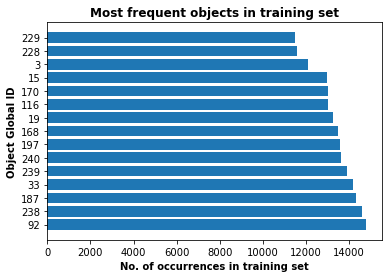

In [89]:
plot_most_common(train_obj_dict_sorted, "training set", k=15)

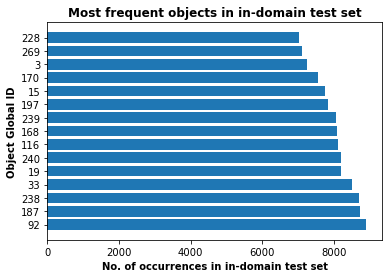

In [90]:
plot_most_common(in_domain_obj_dict_sorted, "in-domain test set", k=15)

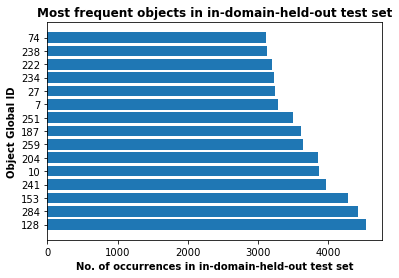

In [91]:
plot_most_common(in_domain_held_out_obj_dict_sorted, "in-domain-held-out test set", k=15)

### 2.5 Calculating percentage of mentioned objects that are also the targets in cloth_store_1498649_woman

In [30]:
with open('./processed/train.json', 'r') as f:
    train_data = json.load(f)
 
with open('./processed/devtest.json', 'r') as f:
    devtest_data = json.load(f)

In [16]:
import json

with open('./processed/new_datasets/in_domain_held_out_test.json', 'r') as f:
    idho_data = json.load(f)

with open('./processed/new_datasets/in_domain_test.json', 'r') as f:
    indom_data = json.load(f)

In [22]:
def calc_mentioned_targets_perc(data):
    n_targets = 0
    n_ment = 0
    for line in data:
        for target_idx in line['reference_idx']:
            if line['candidate_mentioned'][target_idx] == 1:
                n_ment += 1
        n_targets += len(line['reference_idx'])
    
    return n_ment/n_targets * 100


In [23]:
calc_mentioned_targets_perc(devtest_data)

57.45950554134698

In [24]:
calc_mentioned_targets_perc(indom_data)

57.39411847474321

In [25]:
calc_mentioned_targets_perc(idho_data)

56.00160578081091

In [26]:
import numpy as np

def count_mean_candidate_objs(data):
    n_objs = []
    for line in data:
        n_objs.append(len(line['candidate_ids']))
    return np.mean(n_objs)

In [31]:
count_mean_candidate_objs(train_data)

27.245761959705334

In [32]:
count_mean_candidate_objs(devtest_data)

27.55691745990351

In [33]:
count_mean_candidate_objs(indom_data)

35.92111111111111

In [34]:
count_mean_candidate_objs(idho_data)

29.99937284415177

## 3.0 Adding more attributes to the object description

In [13]:
import json
import torch

In [64]:
with open('./processed/devtest.json', 'r', encoding='utf-8') as f:
    devtest_data = json.load(f)

In [84]:
devtest_data[1736]['objects'][0]

'Item 0 is located at x : -614.89, y : -0.00, z: -280.93. Its located in the bounding box 130 370 57 71. Its price is $649. Its brand is Art Den. It is made with wood. It has a customer review of 3.8 out of 5. Its color is wooden. Its type is CoffeeTable. Its color is wooden. Its type is CoffeeTable. Its color is wooden. Its type is CoffeeTable.'

In [57]:
def get_id_from_attr_str(attr_str):
    start = attr_str.find('Item ')
    end = attr_str.find(' is located at')
    id = attr_str[start+len('Item '):end]
    return int(id)

id = get_id_from_attr_str(dev_data[0]['objects'][1])

In [58]:
KB_fash_path = './data/fashion_prefab_metadata_all.json'
KB_furn_path = './data/furniture_prefab_metadata_all.json'

with open(KB_fash_path, 'r', encoding='utf-8') as f:
    KB_fash = json.load(f)

with open(KB_furn_path, 'r', encoding='utf-8') as f:
    KB_furn = json.load(f)

In [83]:
FASH_ATTR_NAME_LIST = ['color', 'type', 'assetType', 'pattern', 'sleeveLength']
FURN_ATTR_NAME_LIST = ['color', 'type']

def func(data):
    for j,line in enumerate(data):
        for i in range(len(line['objects'])):
            cand_id = get_id_from_attr_str(line['objects'][i])
            idx = line['candidate_ids'].index(cand_id)
            abs_id = line['KB_ids'][idx]-1
            if line['domain'] == 'fashion':
                key = list(KB_fash.keys())[abs_id]
                entry = KB_fash[key]
                line['objects'][i] += " Its color is "+entry['color']+\
                                    ". Its type is "+entry['type']+\
                                    ". Its asset type is "+entry['assetType']+\
                                    ". Its pattern is "+entry['pattern']+\
                                    ". Its sleeve length is "+entry['sleeveLength']+"."
            else:
                #print("Furn", j, abs_id-288)
                abs_id = abs_id - 288
                key = list(KB_furn.keys())[abs_id]
                entry = KB_furn[key]
                print(entry)
                line['objects'][i] += " Its color is "+entry['color']+\
                                    ". Its type is "+entry['type']+"."

                return

func(devtest_data)
        

{'brand': 'Art Den', 'color': 'wooden', 'customerRating': 3.8, 'materials': 'wood', 'price': '$649', 'type': 'CoffeeTable'}


## 4. Adding num_target_objs head to UNITER

In [3]:
with open('./processed/train.json', 'r', encoding='utf-8') as f:
    train_data = json.load(f)

In [12]:
print(train_data[1].keys())
print(train_data[1]['reference_mask'])
print(train_data[1]['reference_idx'])
print(train_data[1]['candidate_ids'])
print(train_data[1]['KB_ids'])
print(len(train_data[1]['candidate_ids']), len(train_data[1]['KB_ids']))

dict_keys(['dial', 'objects', 'reference_mask', 'reference_idx', 'candidate_ids', 'candidate_pos', 'candidate_bbox', 'candidate_relations', 'scene_seg', 'KB_ids', 'scenes', 'domain', 'dial_idx', 'round_idx', 'candidate_mentioned'])
[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 6]
[59, 80, 55, 67, 68, 70, 82, 79, 69, 72, 71, 73, 61, 62, 63, 58, 74, 75, 64, 76, 0, 1, 2, 3, 4, 5, 6, 7, 8]
[117, 128, 51, 133, 228, 236, 53, 284, 226, 138, 234, 110, 14, 16, 16, 19, 284, 167, 54, 68, 168, 260, 261, 197, 10, 228, 73, 81, 7]
29 29


In [22]:
arr = torch.tensor([1,0,0,1,2,2,1,0,2,1,3,2,2,1,3,0])

new_arr = torch.zeros(arr.shape[0], 4)

for i in range(len(arr)):
    idx = arr[i] if arr[i] < 3 else 3
    new_arr[i][idx] = 1
new_arr

tensor([[0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 0., 0., 1.],
        [1., 0., 0., 0.]])

## 5. 100 random examples subset of devtest: statistics

In [1]:
import json

with open('./processed/random_test_subset/random_devtest_samples.json', 'r') as f:
    subset_data = json.load(f)

with open('./processed/devtest.json', 'r') as f:
    devtest_data = json.load(f)

In [7]:
noref = 0
for example in devtest_data:
    if len(example['reference_idx']) == 0:
        noref += 1
print("Percentage of examples without any target on devtest set:", noref/len(devtest_data) * 100)

noref = 0
for example in subset_data:
    if len(example['reference_idx']) == 0:
        noref += 1
print("Percentage of examples without any target on random subset:", noref/len(subset_data) * 100)


Percentage of examples without any target on devtest set: 50.17603338114487
Percentage of examples without any target on random subset: 53.0


In [12]:
n_men = 0
n_targets = 0
for example in devtest_data:
    for idx in example['reference_idx']:
        n_targets += 1
        if example['candidate_mentioned'][idx] == 1:
            n_men += 1
print("Percentage of targets that were previously mentioned in the dialog on devtest set:", n_men/n_targets * 100)

n_men = 0
n_targets = 0
for example in subset_data:
    for idx in example['reference_idx']:
        n_targets += 1
        if example['candidate_mentioned'][idx] == 1:
            n_men += 1
print("Percentage of targets that were previously mentioned in the dialog on devtest set:", n_men/n_targets * 100)

Percentage of targets that were previously mentioned in the dialog on devtest set: 57.45950554134698
Percentage of targets that were previously mentioned in the dialog on devtest set: 75.0
